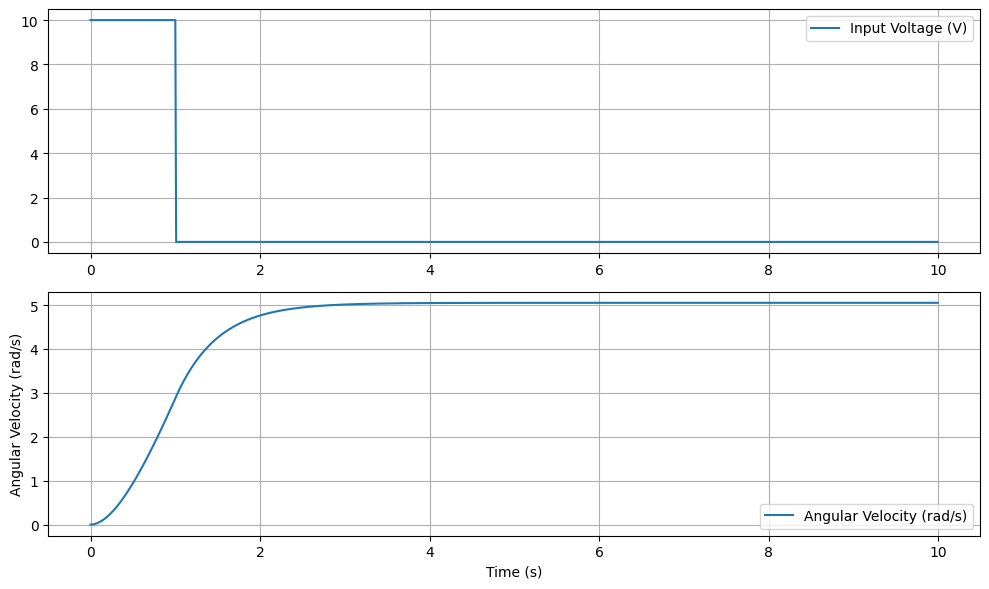

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
R = 1.0  # Resistance (ohms)
L = 0.5  # Inductance (henries)
K = 0.01  # Motor constant (N/A)
J = 0.02  # Moment of inertia (kg.m^2)

# Time parameters
dt = 0.01  # Time step
t = np.arange(0, 10, dt)  # Time array

# Input voltage (step function)
V = np.ones_like(t) * 10
V[t > 1] = 0  # Turn off voltage after 1 second

# Simulation
I = np.zeros_like(t)  # Current array
omega = np.zeros_like(t)  # Angular velocity array

for i in range(1, len(t)):
    I[i] = I[i - 1] + ((V[i - 1] - I[i - 1] * R) / L) * dt
    torque = K * I[i]  # Torque equation
    alpha = torque / J  # Angular acceleration
    omega[i] = omega[i - 1] + alpha * dt  # Angular velocity

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, V, label='Input Voltage (V)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, omega, label='Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

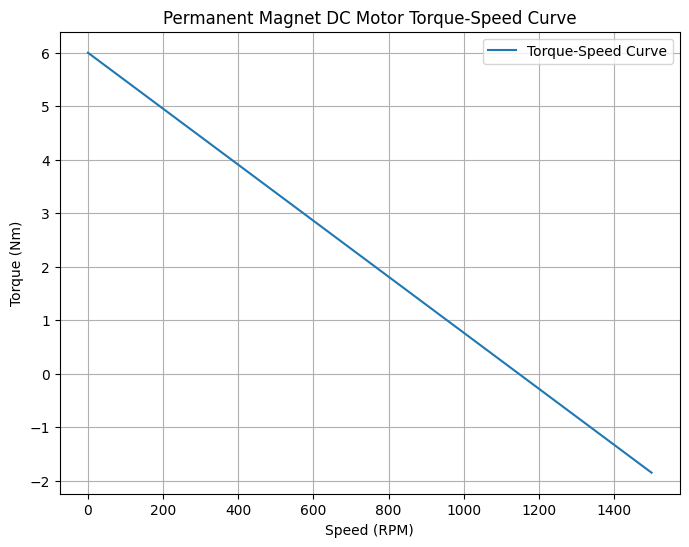

In [2]:
# Constants
V_nominal = 12  # Nominal voltage (V)
omega_nominal = 1000 * 2 * np.pi / 60  # Nominal speed (rad/s)
K_torque = 0.1  # Torque constant (Nm/A)
R_internal = 2  # Internal resistance (ohms)

# Torque-Speed Curve Calculation
I = (V_nominal - omega_nominal * K_torque) / R_internal  # Current at nominal speed
torque = K_torque * I  # Torque at nominal speed

# Speed range for the curve
omega_range = np.linspace(0, 1500 * 2 * np.pi / 60, 1000)  # Speed range from 0 to 1500 RPM

# Torque calculation for the speed range
torque_curve = (V_nominal - omega_range * K_torque) / R_internal

# Plotting Torque-Speed Curve
plt.figure(figsize=(8, 6))
plt.plot(omega_range * 60 / (2 * np.pi), torque_curve, label='Torque-Speed Curve')
plt.xlabel('Speed (RPM)')
plt.ylabel('Torque (Nm)')
plt.title('Permanent Magnet DC Motor Torque-Speed Curve')
plt.legend()
plt.grid(True)
plt.show()

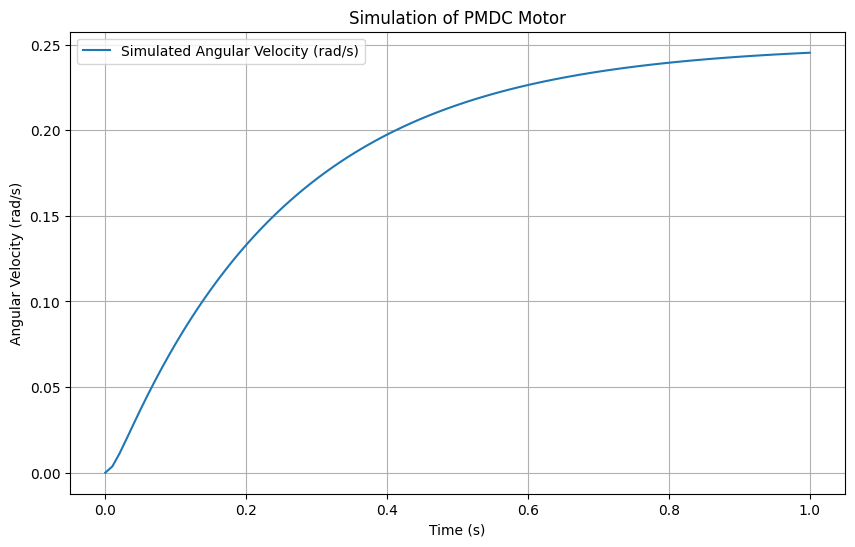

In [3]:
from scipy.integrate import odeint

# PMDC motor model equations
def motor_model(y, t, V, R_internal, K_torque, J):
    omega, I = y
    domega_dt = (K_torque * I - omega * R_internal) / J
    dI_dt = (V - I * R_internal) / L
    return [domega_dt, dI_dt]

# Simulation parameters
t = np.linspace(0, 1, 100)  # Time array (1 second simulation)
V = 10  # Input voltage (V)

# Initial conditions
initial_conditions = [0, 0]  # Initial angular velocity (rad/s) and current (A)

# Solve the motor model using odeint
solution = odeint(motor_model, initial_conditions, t, args=(V, R_internal, K_torque, J))

# Extract angular velocity and current from the solution
omega_simulated, I_simulated = solution[:, 0], solution[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, omega_simulated, label='Simulated Angular Velocity (rad/s)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Simulation of PMDC Motor')
plt.legend()
plt.grid(True)
plt.show()